In [2]:
# I - Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sys

In [3]:
#II - Importing dataset

db = pd.read_csv('heart.csv')

In [4]:
db.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print('Number of rows in the dataset: ',db.shape[0])
print('Number of columns in the dataset: ',db.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [9]:
#To check for null value

db.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
db.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


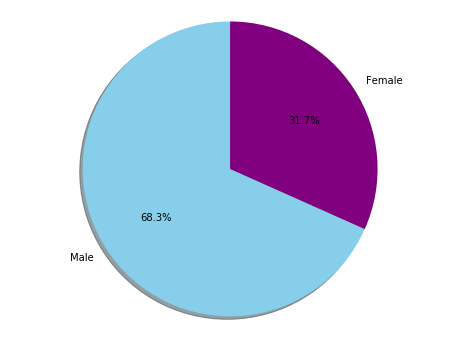

In [18]:
#lets check the various attributes
#lets check the sex attribute

male =len(db[db['sex'] == 1])
female = len(db[db['sex']== 0])

plt.figure(figsize=(8,6))
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'purple']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

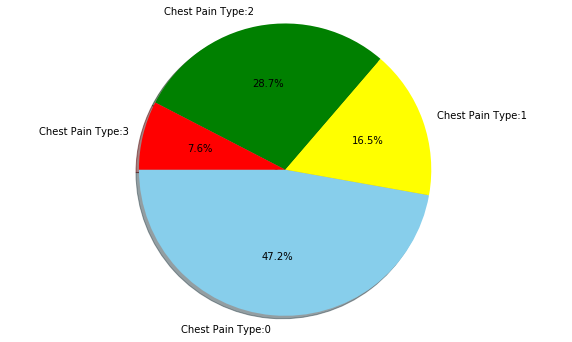

In [21]:
plt.figure(figsize=(10,6))

labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(db[db['cp'] == 0]),
         len(db[db['cp'] == 1]),
         len(db[db['cp'] == 2]),
         len(db[db['cp'] == 3])]
colors = ['skyblue', 'yellow','green','red']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

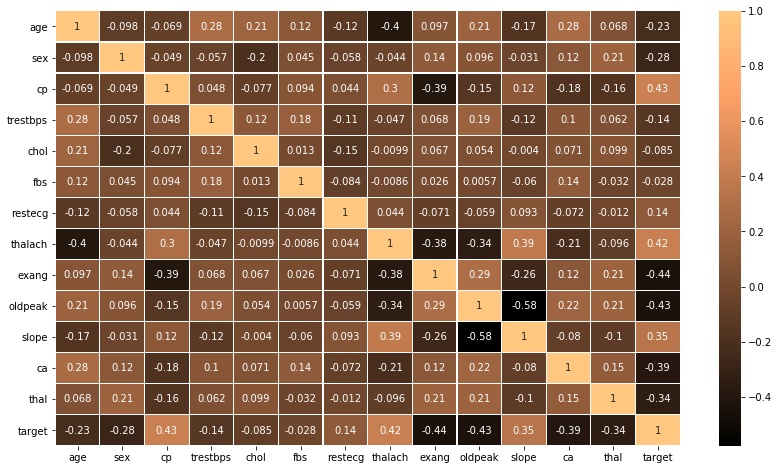

In [25]:
plt.figure(figsize=(14,8))
sns.heatmap(db.corr(), annot = True, cmap='copper',linewidths=.1)
plt.show()

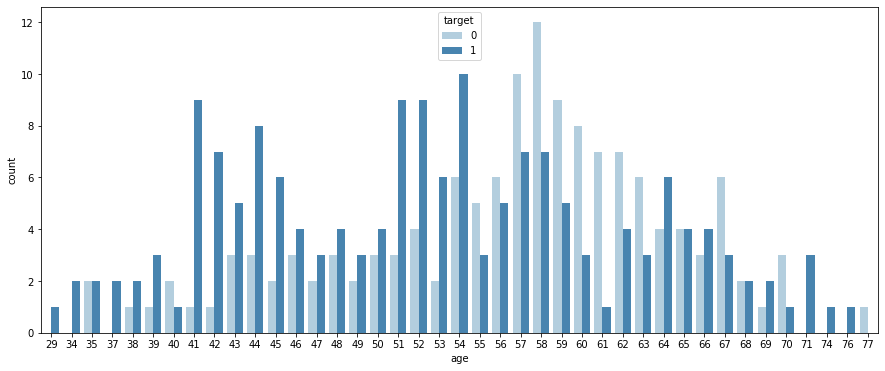

In [27]:
#Number of people having heart disease according to age 0 - female and 1 - male

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = db, hue = 'target',palette='Blues')
plt.show()

In [30]:
# drop rows with NaN values from DataFrame
db = db.dropna(axis=0)
db.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [32]:
# print the shape and data type of the dataframe

print(db.shape)
print(db.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [35]:
# transform data to numeric to enable further analysis

db = db.apply(pd.to_numeric)
db.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [38]:
db.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


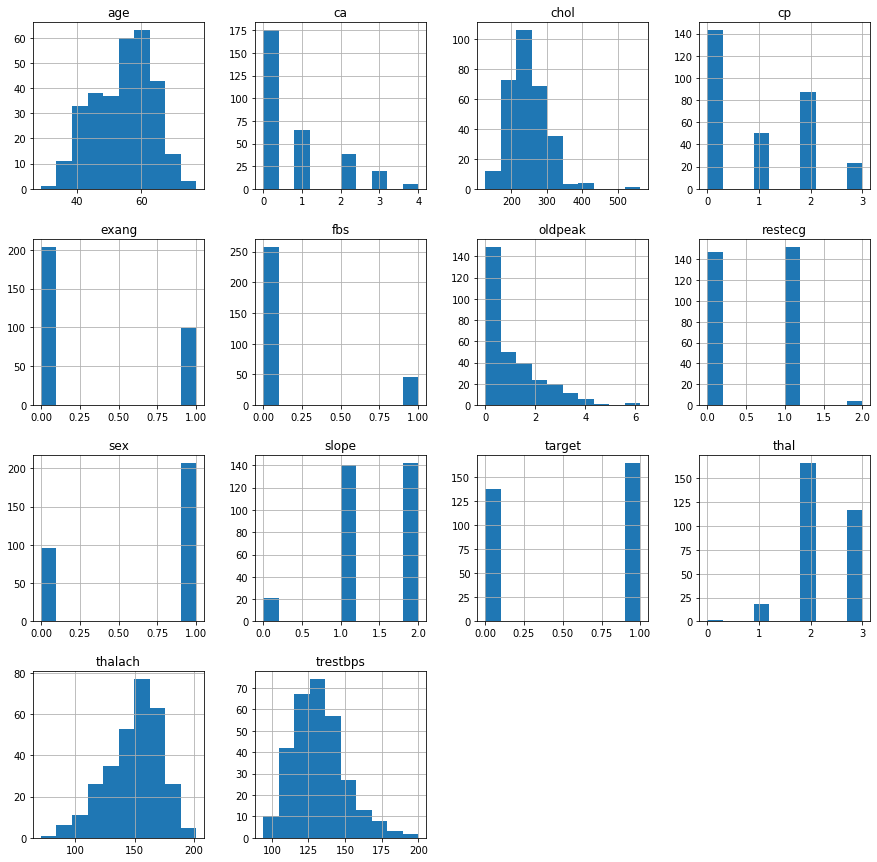

In [41]:
# plot histograms for each variable

db.hist(figsize = (15, 15))
plt.show()

In [42]:
X = np.array(db.drop(['target'], 1))
y = np.array(db['target'])

In [44]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [45]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [47]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [49]:
#III - Training & Testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
# convert the data to categorical labels

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [53]:
#IV - Building the CNN

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [55]:
# define a function to build the keras model

def create_hd():
    # create model
    hd = Sequential()
    
    hd.add(Dense(32, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    hd.add(Dropout(0.25))
    
    hd.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    hd.add(Dropout(0.25))
    
    hd.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    hd.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return hd

hd = create_hd()

print(hd.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
# fit the model to the training data

history = hd.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=25, batch_size=15)

Train on 242 samples, validate on 61 samples
Epoch 1/25
242/242 [==============================] - 0s 823us/step - loss: 0.2955 - accuracy: 0.8967 - val_loss: 0.4317 - val_accuracy: 0.8852
Epoch 2/25
242/242 [==============================] - 0s 571us/step - loss: 0.3118 - accuracy: 0.8678 - val_loss: 0.4369 - val_accuracy: 0.8689
Epoch 3/25
242/242 [==============================] - 0s 734us/step - loss: 0.2975 - accuracy: 0.8760 - val_loss: 0.4398 - val_accuracy: 0.8689
Epoch 4/25
242/242 [==============================] - 0s 629us/step - loss: 0.2956 - accuracy: 0.8843 - val_loss: 0.4395 - val_accuracy: 0.8689
Epoch 5/25
242/242 [==============================] - 0s 733us/step - loss: 0.2818 - accuracy: 0.9008 - val_loss: 0.4379 - val_accuracy: 0.8689
Epoch 6/25
242/242 [==============================] - 0s 671us/step - loss: 0.2831 - accuracy: 0.8967 - val_loss: 0.4444 - val_accuracy: 0.8689
Epoch 7/25
242/242 [==============================] - 0s 795us/step - loss: 0.2803 - accura

In [60]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(hd.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8688524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

